# KNN- Classification

In [1]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.feature_selection import RFECV

In [2]:
data_for_model = pickle.load(open("C:/Users/vatsal/Desktop/machine learning/model builidng/data/abc_classification_modelling.p", "rb"))
data_for_model

,customer_id,signup_flag,distance_from_store,gender,credit_score,total_sales,total_items,transaction_count,product_area_count,average_basket_value
0,74,1,3.38,F,0.59,1586.89,195,26,5,61.034231
1,524,1,4.76,F,0.52,2397.26,258,27,5,88.787407
2,607,1,4.45,F,0.49,1279.91,183,22,5,58.177727
3,343,0,0.91,M,0.54,967.14,102,17,5,56.890588
4,322,1,3.02,F,0.63,1566.35,182,30,5,52.211667
...,...,...,...,...,...,...,...,...,...,...
855,372,1,4.38,F,0.50,1381.28,103,12,5,115.106667
856,104,1,2.36,F,0.63,1464.62,127,22,5,66.573636
857,393,1,1.87,M,0.59,2213.97,191,38,5,58.262368
858,373,0,0.21,M,0.47,1446.00,133,22,5,65.727273


In [4]:
data_for_model.drop("customer_id", axis =1, inplace=True)
data_for_model

C:\Users\vatsal\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,signup_flag,distance_from_store,gender,credit_score,total_sales,total_items,transaction_count,product_area_count,average_basket_value
714,0,1.64,M,0.58,27.81,6,3,3,9.270000
605,0,0.88,M,0.63,26.62,9,3,2,8.873333
120,0,0.56,M,0.62,886.78,154,18,4,49.265556
208,0,0.11,M,0.58,1256.19,168,34,5,36.946765
380,0,1.32,M,0.36,739.67,110,21,3,35.222381
...,...,...,...,...,...,...,...,...,...
71,0,0.07,M,0.57,746.15,133,24,5,31.089583
106,0,1.96,F,0.60,881.49,166,24,4,36.728750
270,0,1.59,M,0.50,319.37,85,17,5,18.786471
435,0,0.71,F,0.54,273.94,74,20,4,13.697000


In [5]:
#shuffle data
data_for_model = shuffle(data_for_model, random_state = 42)

In [6]:
#Class Balance

data_for_model["signup_flag"].value_counts(normalize=True)

0    0.689535
1    0.310465
Name: signup_flag, dtype: float64

In [7]:
data_for_model.dropna(how="any", inplace=True)
data_for_model

C:\Users\vatsal\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,signup_flag,distance_from_store,gender,credit_score,total_sales,total_items,transaction_count,product_area_count,average_basket_value
754,0,1.35,M,0.71,44.59,9,2,2,22.295000
262,0,1.88,F,0.51,907.37,124,29,5,31.288621
543,0,0.99,F,0.67,792.20,138,32,5,24.756250
165,0,0.34,M,0.70,638.42,162,13,3,49.109231
513,0,0.23,M,0.74,739.88,133,29,5,25.513103
...,...,...,...,...,...,...,...,...,...
110,0,2.88,F,0.69,888.29,148,26,4,34.165000
549,0,1.51,F,0.59,743.30,108,30,5,24.776667
595,0,0.47,M,0.61,750.47,125,27,5,27.795185
274,1,3.68,F,0.59,1890.10,237,31,5,60.970968


In [8]:
#dealing with Outliers
outlier_investigation = data_for_model.describe()
outlier_investigation

,signup_flag,distance_from_store,credit_score,total_sales,total_items,transaction_count,product_area_count,average_basket_value
count,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000
mean,0.304604,2.614545,0.597521,968.166411,143.877214,22.214876,4.177096,38.034161
std,0.460512,14.397590,0.102264,1073.647531,125.342694,11.721699,0.920887,24.243691
min,0.000000,0.000000,0.260000,2.090000,1.000000,1.000000,1.000000,2.090000
25%,0.000000,0.730000,0.530000,383.940000,77.000000,16.000000,4.000000,21.734700
50%,0.000000,1.640000,0.590000,691.640000,123.000000,23.000000,4.000000,31.069333
75%,1.000000,2.920000,0.670000,1121.530000,170.500000,28.000000,5.000000,46.429973
max,1.000000,400.970000,0.880000,7372.060000,910.000000,75.000000,5.000000,141.054091


In [9]:
outlier_columns = ["distance_from_store", "total_sales", "total_items"]
#boxplot approach

for column in outlier_columns:
    lower_quartile = data_for_model[column].quantile(0.25)
    upper_quartile = data_for_model[column].quantile(0.75)
    iqr = upper_quartile - lower_quartile
    iqr_extended = iqr * 2
    min_border = lower_quartile - iqr_extended
    max_border = upper_quartile + iqr_extended
    
    outliers = data_for_model[(data_for_model[column] < min_border) | (data_for_model[column] > max_border)].index
    print(f"{len(outliers)} outliers detected in column {column}")
    
    data_for_model.drop(outliers, inplace=True)

8 outliers detected in column distance_from_store
54 outliers detected in column total_sales
3 outliers detected in column total_items


In [10]:
#split input variables & output variables

X = data_for_model.drop(["signup_flag"], axis = 1)
y = data_for_model["signup_flag"]
X, y

(     distance_from_store gender  credit_score  total_sales  total_items  \
 754                 1.35      M          0.71        44.59            9   
 262                 1.88      F          0.51       907.37          124   
 543                 0.99      F          0.67       792.20          138   
 165                 0.34      M          0.70       638.42          162   
 513                 0.23      M          0.74       739.88          133   
 ..                   ...    ...           ...          ...          ...   
 110                 2.88      F          0.69       888.29          148   
 549                 1.51      F          0.59       743.30          108   
 595                 0.47      M          0.61       750.47          125   
 274                 3.68      F          0.59      1890.10          237   
 685                 3.06      F          0.70       210.45           60   
 
      transaction_count  product_area_count  average_basket_value  
 754              

In [11]:
#split out Training & test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify= y)

In [12]:
#deal with categorical variables

categorical_vars = ["gender"]

one_hot_encoder = OneHotEncoder(sparse=False, drop="first")

X_train_encoded = one_hot_encoder.fit_transform(X_train[categorical_vars])
X_test_encoded = one_hot_encoder.transform(X_test[categorical_vars])

encoder_feature_names = one_hot_encoder.get_feature_names(categorical_vars)

X_train_encoded = pd.DataFrame(X_train_encoded, columns = encoder_feature_names)
X_train = pd.concat([X_train.reset_index(drop=True), X_train_encoded.reset_index(drop=True)], axis = 1)
X_train.drop(categorical_vars, axis =1, inplace = True)

X_test_encoded = pd.DataFrame(X_test_encoded, columns = encoder_feature_names)
X_test = pd.concat([X_test.reset_index(drop=True), X_test_encoded.reset_index(drop=True)], axis = 1)
X_test.drop(categorical_vars, axis =1, inplace = True)
X_train

C:\Users\vatsal\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,distance_from_store,credit_score,total_sales,total_items,transaction_count,product_area_count,average_basket_value,gender_M
0,0.85,0.78,1163.46,165,26,3,44.748462,1.0
1,0.97,0.63,1240.22,129,33,5,37.582424,1.0
2,3.41,0.58,1342.74,201,23,5,58.380000,0.0
3,0.50,0.71,470.44,114,30,4,15.681333,0.0
4,1.20,0.70,368.03,81,15,4,24.535333,1.0
...,...,...,...,...,...,...,...,...
620,2.17,0.51,103.49,27,7,4,14.784286,1.0
621,0.31,0.72,671.40,90,18,5,37.300000,1.0
622,0.86,0.75,536.86,120,32,4,16.776875,0.0
623,0.39,0.69,559.56,149,23,3,24.328696,1.0


In [14]:
#Feature Scaling
scale_norm = MinMaxScaler()
X_train = pd.DataFrame(scale_norm.fit_transform(X_train), columns = X_train.columns)
X_test = pd.DataFrame(scale_norm.transform(X_test), columns = X_test.columns)
X_train

,distance_from_store,credit_score,total_sales,total_items,transaction_count,product_area_count,average_basket_value,gender_M
0,0.170341,0.818182,0.475574,0.517350,0.609756,0.50,0.375907,1.0
1,0.194389,0.545455,0.507014,0.403785,0.780488,1.00,0.312342,1.0
2,0.683367,0.454545,0.549006,0.630915,0.536585,1.00,0.496822,0.0
3,0.100200,0.690909,0.191718,0.356467,0.707317,0.75,0.118075,0.0
4,0.240481,0.672727,0.149772,0.252366,0.341463,0.75,0.196612,1.0
...,...,...,...,...,...,...,...,...
620,0.434870,0.327273,0.041418,0.082019,0.146341,0.75,0.110118,1.0
621,0.062124,0.709091,0.274030,0.280757,0.414634,1.00,0.309837,1.0
622,0.172345,0.763636,0.218923,0.375394,0.756098,0.75,0.127792,0.0
623,0.078156,0.654545,0.228221,0.466877,0.536585,0.50,0.194779,1.0


Optimal number of features: 3


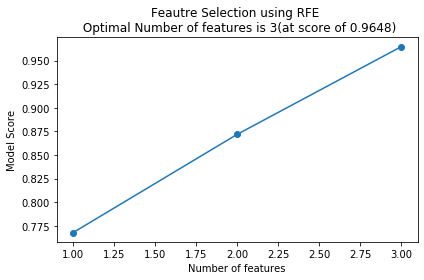

In [29]:
#Feature Selection
from sklearn.ensemble import RandomForestClassifier

clf= RandomForestClassifier(random_state = 42)
feature_selector = RFECV(clf)

fit = feature_selector.fit(X_train,y_train)

optimal_feature_count = feature_selector.n_features_
print(f"Optimal number of features: {optimal_feature_count}")

X_train = X_train.loc[:, feature_selector.get_support()]
X_test = X_test.loc[:, feature_selector.get_support()]

plt.plot(range(1, len(fit.cv_results_['mean_test_score']) + 1), fit.cv_results_['mean_test_score'], marker="o")
plt.ylabel("Model Score")
plt.xlabel("Number of features")
plt.title(f"Feautre Selection using RFE \n Optimal Number of features is {optimal_feature_count}(at score of {round(max(fit.cv_results_['mean_test_score']), 4)})")
plt.tight_layout()
plt.show()

In [30]:
#Model Training
clf= KNeighborsClassifier()
clf.fit(X_train, y_train)

KNeighborsClassifier()

In [31]:
#Model assessment
y_pred_class = clf.predict(X_test)

y_pred_prob = clf.predict_proba(X_test)[:,1]

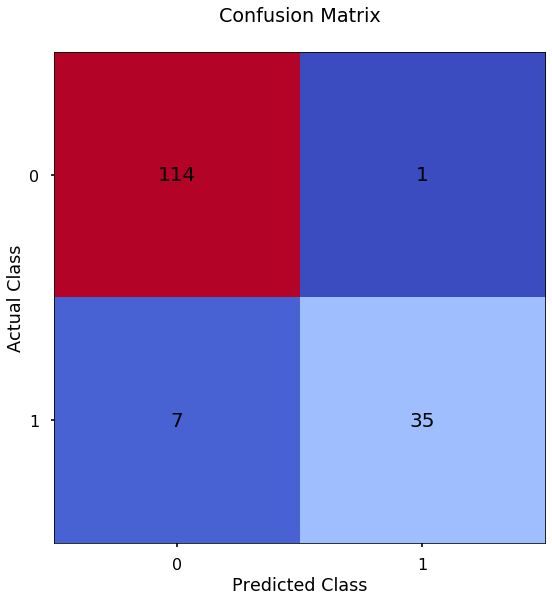

In [32]:
# Confusion maxtrix

conf_matrix = confusion_matrix(y_test, y_pred_class)

plt.style.use("seaborn-poster")
plt.matshow(conf_matrix, cmap = "coolwarm")
plt.gca().xaxis.tick_bottom()
plt.title("Confusion Matrix")
plt.ylabel("Actual Class")
plt.xlabel("Predicted Class")
for (i,j), corr_value in np.ndenumerate(conf_matrix):
    plt.text(j,i,corr_value,ha="center", va="center", fontsize=20)
plt.show()

In [33]:
#Accuracy(number of correct classification out of all attempted classfications)

accuracy_score(y_test, y_pred_class)

0.9490445859872612

In [34]:
#Precision(of all observations that were predicted as positive, how many are actually positive)

precision_score(y_test, y_pred_class)

0.9722222222222222

In [35]:
#Recall(of all positive observations how many did we predict as positive)
recall_score(y_test, y_pred_class)

0.8333333333333334

In [36]:
# F1-Score(the harmonic mean of precision and recall)
f1_score(y_test, y_pred_class)

0.8974358974358975

In [37]:
#Finding the optimal of k
k_list = list(range(2,25))
accuracy_scores = []

for k in k_list:
    clf = KNeighborsClassifier(n_neighbors = k)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = f1_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

In [38]:
accuracy_scores

[0.821917808219178,
 0.8780487804878048,
 0.8684210526315789,
 0.8974358974358975,
 0.8684210526315789,
 0.8674698795180722,
 0.810126582278481,
 0.8292682926829269,
 0.810126582278481,
 0.7901234567901233,
 0.8051948051948051,
 0.7848101265822786,
 0.7733333333333333,
 0.7948717948717949,
 0.7777777777777778,
 0.7777777777777778,
 0.7647058823529412,
 0.7887323943661971,
 0.782608695652174,
 0.8055555555555556,
 0.7536231884057971,
 0.7536231884057971,
 0.7647058823529412]

In [39]:
max_accuracy = max(accuracy_scores)
max_accuracy_idx = accuracy_scores.index(max_accuracy)
optimal_k_value = k_list[max_accuracy_idx]
max_accuracy, optimal_k_value, max_accuracy_idx


(0.8974358974358975, 5, 3)

<function matplotlib.pyplot.show(*args, **kw)>

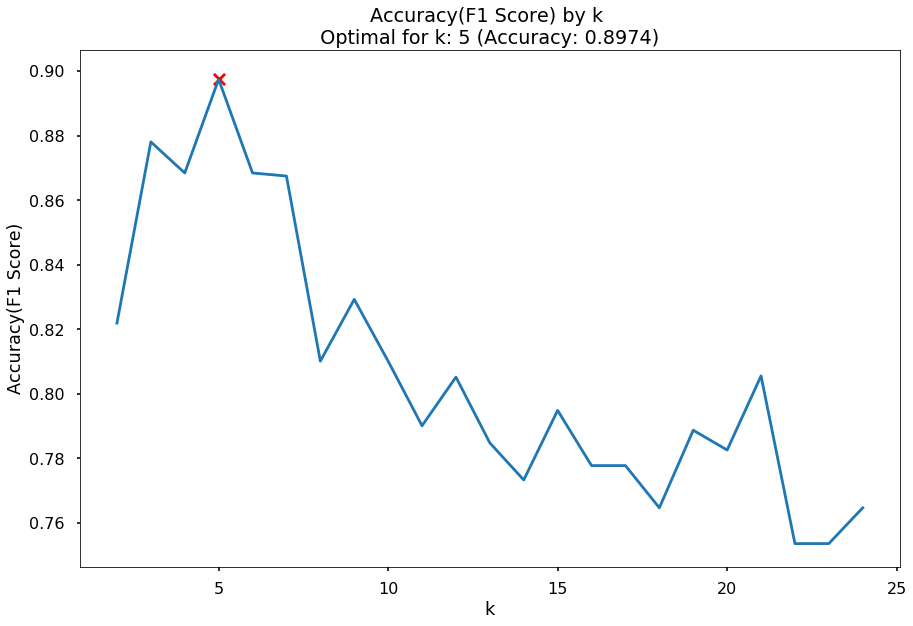

In [40]:
# Plot of max depth

plt.plot(k_list, accuracy_scores)
plt.scatter(optimal_k_value, max_accuracy, marker = "x", color="red")
plt.title(f"Accuracy(F1 Score) by k \n Optimal for k: {optimal_k_value} (Accuracy: {round(max_accuracy, 4)}) ")
plt.xlabel("k")
plt.ylabel("Accuracy(F1 Score)")
plt.tight_layout()
plt.show